# Visuals and Arts 2

Up to now we have mainly used this session to introduce how to produce visuals of data. This is important but Manovich also had the analysis of images and other multimedia in mind when he first defined Cultural Analytics. Next, we talk therefore about a few simple exercises to work with images. We will see that basic image manipulation is actually quite simple because images are matrixes and can be manipulated just like any other matrix.

Let's start by reading the jpeg picture using PIL and imshow to display the image inline,


In [117]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import matplotlib as plt

%matplotlib inline

Gogh = Image.open('data/vanGogh_selfPortrait.jpg')

Next, convert the values of the image into a numpy array and check out the dimensions of vanGogh with numpy: np.shape(vanGogh)

In [118]:
nGogh = np.array(Gogh)
np.shape(nGogh)

(768, 608, 3)

As expected, vanGogh is a 3-dimensional numpy array. It is a 768 by 608 image (first 2 components of the array). The last dimension of this array is the channel with 3 values (1 for red, 2 for green, 3 for blue).

Let's use imshow() to display this array as the actual image that it is.

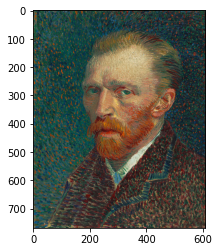

In [119]:
imshow(nGogh)

If we handle the image as a numpy array we can also manipulate it as we would a numpy array, by for example cropping it:

In [120]:
crop = nGogh[100:400,100:400,]
np.shape(crop)


(300, 300, 3)

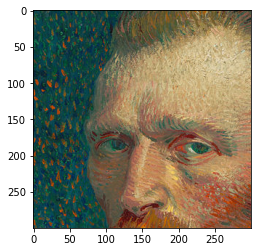

In [121]:
imshow(crop)

Rotation of images is also funny. 
The NumPy function that rotates ndarray is np.rot90(), so let us rotate the master with it.

In [122]:
rotated_gogh = np.rot90(nGogh)

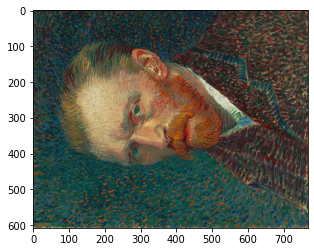

In [123]:
imshow(rotated_gogh)

Next we filter out the blue and the green colour channels so that we are left only with the red:

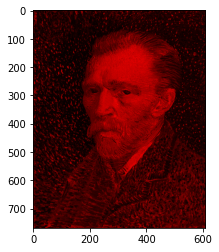

In [130]:
red = nGogh.copy()
red[:,:,2] = 0 # set green to zero
red[:,:,1] = 0 # set blue to zero
imshow(red)

Finally, we would like to produce a black and white van Gogh. A black and white image consists of a single pixel value for all RGB channels. For each of the channels, we simply need to calculate the average of all three colour channels. First, let us make a copy again

In [154]:
BW = nGogh.copy()

Then, we calculate the average of all three RGB channels and assign it to the red channel first 

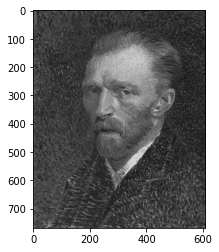

In [184]:
BW = np.mean(nGogh, axis=-1)

imshow(BW, cmap = plt.get_cmap('gray'))

Or we can use the lumonicity formula: R * 299/1000 + G * 587/1000 + B * 114/1000

In [191]:
BW = np.dot(nGogh[...,:3], [0.299, 0.587, 0.114])

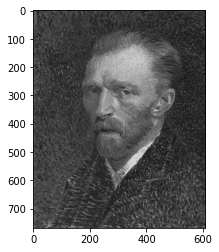

In [193]:
imshow(BW, cmap = plt.get_cmap('gray'))

That is almost it for today. I think you got the idea that images are pixel matrixes/arrays based on colour channels that you can manipulate like any other matrix of numbers. Using this knowledge, you could analyse, for instance, digital images of paintings to find out whether they are by the same artist. Take a look at a Kaggle competition (https://www.kaggle.com/c/painter-by-numbers), which promises to develop an algorithm to detect art forgeries. The algorithm is supposed to assess with certainty that paintings are by van Gogh or not. For the competition, they use images freely available from https://www.wikiart.org/. You could also download a few from the site and apply your newly learned skills

For the rest of today’s session, we go through a few more or less fun exercises to show you a few of the more advanced image analytics you can perform in order to complete Manovich’s idea of Cultural Analytics. The first question, I would like to address is what the average digital humanities person (say from King’s College London) looks like. Think about it and ask yourself how we could do this after everything we have just learned about the numbers of images and quantified colours.

I have prepared a function average_DH_person that calculates the average image from several JPEGs (only JPEGs at the moment). It simply delivers the average of all pixel values in all the images in the folder. You call average_DH_person() with the folder these images can be found in using glob. I have added a few images of DDH members to your data

In [222]:
def average_DH_person(images):
    ims = []
    for image in images:
        with open(image, 'rb') as file:
            img = Image.open(file)
            imshow(img)
            ims.append(img)

    ims = np.array([np.array(im) for im in ims])
    avg = np.average(ims,axis=0)
    result = Image.fromarray(avg.astype('uint8'))
    imshow(result)

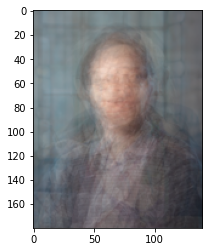

In [223]:
import glob

images = glob.glob("Data/DDH-images/*.jpg")
average_DH_person(images)


Such average images always look like ghosts in my experience. But you can hopefully recognise the shape of a person. Next, let us ask what kind of colours the average DH person prefers to wear. Try to run the functions rgb_max(img) and rgb2hex() to get the most common colour in hex from an image.

In [330]:
def rgb_max(img):
    temp = img.copy()
    colgogh = temp.reshape(-1,3)
    unique, counts = np.unique(colgogh, axis=0, return_counts=True)
    r, g, b  = unique[np.argmax(counts)]
    return r, g, b


def rgb2hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)



We then use the function rgb_max_mult() to get a list of the most common color of each image

In [244]:
def rgb_max_mult(images):
    cols = []
    for image in images:
        with open(image, 'rb') as file:
            img = Image.open(file)
            img = np.array(img)
            r, g, b = rgb_max(img)
            color = rgb2hex(r,g,b)
            cols.append(color)
    return cols

In [247]:
colours = rgb_max_mult(images)

Now let's use Counter to count the frequencies of these most common colors,

Counter creates a dict with the color in hex as the key and the frequency as the value

In [331]:
from collections import Counter 
counts = Counter(colours)
print(counts)

Counter({'#ffffff': 3, '#000000': 3, '#fefefe': 2, '#fbfbfb': 1, '#d8f4ff': 1, '#d1eeff': 1, '#f4f4f2': 1, '#360f14': 1, '#010103': 1, '#baedfe': 1, '#142736': 1, '#7e9fb0': 1, '#112b44': 1})


Let's plot a piechart of the most common colors of the images using plt.pie()

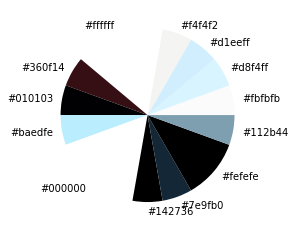

In [322]:
plt.pie([float(v) for v in counts.values()], labels=[str(k) for k in counts], colors = colours,
           autopct=None)
plt.show()

Apparently the most common colors in the pictures are white (#ffffff) and black (#000000), eventhough it shows up as white in the chart

In [274]:
# This still has to be worked out a little bit further but the basis there
# I wasn't sure yet how to do the part with the face API

<AxesSubplot:ylabel='Count'>

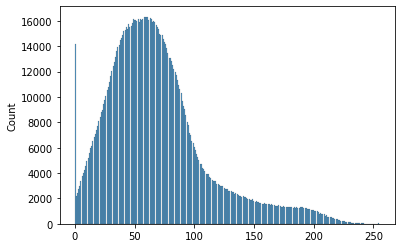

In [305]:
flt = nGogh.flatten()
sns.histplot(data = nGogh, x=flt)

In [309]:
fltr = nGogh[:,:,0].flatten()
fltg = nGogh[:,:,1].flatten()
fltb = nGogh[:,:,2].flatten()

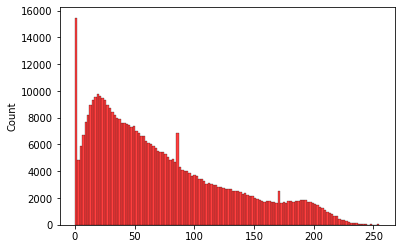

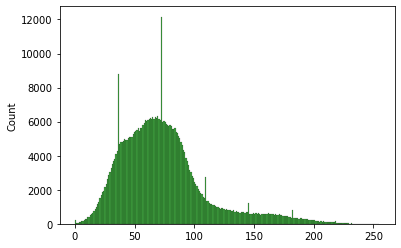

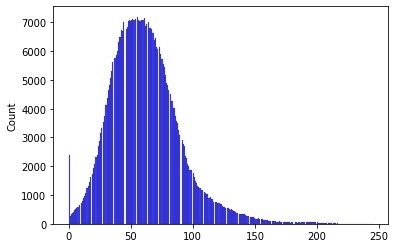

In [329]:
sns.histplot(data = nGogh, x=fltr, color='red')
plt.show()
sns.histplot(data = nGogh, x=fltg, color='green')
plt.show()
sns.histplot(data = nGogh, x=fltb, color='blue')
plt.show()